# Dataset Regresión Lineal – Vehicle dataset:

El objetivo es predecir el precio del autom&oacute;vil en funci&oacute;n de sus atributos. [Referencia](https://www.kaggle.com/nehalbirla/vehicle-dataset-fromcardekho)

### Paso 1: Realizar un an&aacute;lisis exploratorio de los datos para identificar relaciones entre variables, valores at&iacute;picos, tendencias, etc.

In [7]:
#Importar librerias para trabajar

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [11]:
#Cargar datos

In [61]:
Data = pd.read_csv('D:/UNAD/Semestre 4/1. ANÁLISIS DE DATOS (202016908_8)/Actividad 3/Anexo_2_Dataset_Vehicle/car details v3.csv')

In [51]:
#Mostrar en pantalla los datos para hacer el análsisis exploratorio

In [63]:
Data.head(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [25]:
#Descripción de los datos

In [65]:
Data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### Paso 2: Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario 

In [67]:
Data.replace(0, np.nan, inplace=True)
Data.fillna(Data.mean(numeric_only=True), inplace=True)
Data.fillna('NA', inplace=True)

In [35]:
#Motrar en pantalla los datos

In [69]:
Data.head(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000000
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.000000
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.000000
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.000000
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.000000
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.000000


In [39]:
#Confirmar columnas

In [71]:
print(Data.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


In [77]:
#Análisis exploratorio de datos mediante las variables (seats, year, selling_price y km_driven

<Axes: xlabel='km_driven'>

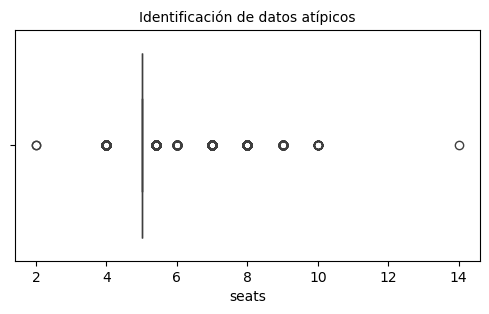

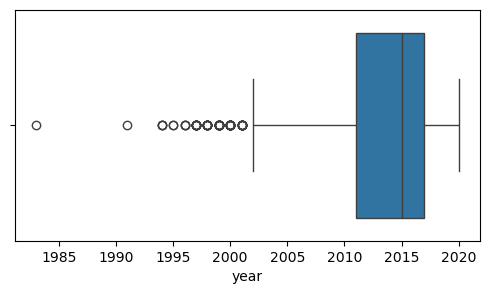

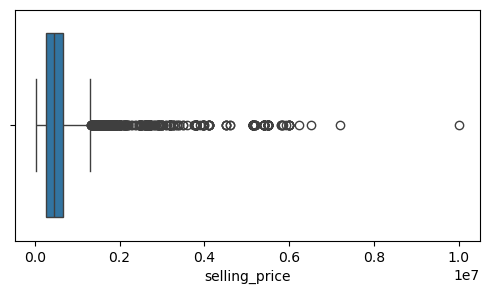

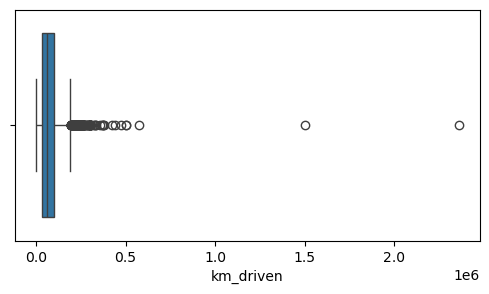

In [79]:
# Variable "seats"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['seats'])
plt.title('Identificación de datos atípicos', fontsize=10)

# Variable "year"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['year'])

# Variable "selling_price"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['selling_price'])

# Variable "km_driven"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['km_driven'])

In [81]:
#Límites para los datos atípicos

In [85]:
max_seats = 10
min_seats = 2
total_seats = ((Data['seats'] < min_seats) | (Data['seats'] > max_seats)).sum()

max_year = 2020
min_year = 1990
total_year = ((Data['year'] < min_year) | (Data['year'] > max_year)).sum()

print("Total registros dataset: {}".format(len(Data)))
print("El total de datos atípicos para la cantidad de seats es {}".format(total_seats))
print("El total de datos atípicos para el año es {}".format(total_year))
print("")
Data.info()

Total registros dataset: 8128
El total de datos atípicos para la cantidad de seats es 1
El total de datos atípicos para el año es 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Paso 3: Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [89]:
data_numerica = Data.copy()
for column in data_numerica.columns:
    if data_numerica[column].dtype == 'object':
        label_encoder = LabelEncoder()
        data_numerica[column] = label_encoder.fit_transform(data_numerica[column])

### Paso 4: Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [102]:
X = data_numerica.drop('selling_price', axis=1)
Y = data_numerica['selling_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [110]:
#Validación de datos en Train

In [108]:
X_train.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4313,704,2012,40000,3,1,1,0,251,10,255,32,5.0
5178,1464,2007,120000,3,1,0,0,23,51,128,240,5.0
758,500,2013,80000,3,1,1,2,281,114,191,407,5.0
7117,117,2016,100000,1,1,1,0,64,89,236,147,9.0
2606,1338,2013,77000,1,1,1,0,325,13,244,178,5.0


In [112]:
#Validación de datos en Test

In [116]:
X_test.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3558,776,2013,40000,1,1,1,0,305,24,294,221,5.0
233,976,2013,70000,1,1,1,0,46,95,103,315,7.0
7952,1258,2019,5000,3,1,0,0,299,119,220,425,5.0
572,1391,2004,120000,3,1,1,4,210,119,224,424,5.0
6960,809,2019,20000,3,0,0,0,315,83,153,197,5.0


### Paso 5: Entrenar el modelo configurando los diferentes hiperparámetros.